#**K-Nearest Neighbors on Iris Dataset**


### **Objective:**  
- To implement the K-Nearest Neighbors (KNN) algorithm for classification.  
- To visualize decision boundaries for different values of K.  
- To evaluate the performance of the model using accuracy, precision, recall, and F1-score.  


### 2. Metadata
**Dataset Used:** Iris dataset (Famous dataset containing measurements of iris flowers).  
**Features:**  
- Sepal Length  
- Sepal Width  
- Petal Length  
- Petal Width  

**Target:**  
- Species of Iris: Setosa, Versicolor, Virginica  

**Source:** UCI Machine Learning Repository  


### 3. Data Overview


In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


# Load the Iris dataset
from sklearn.datasets import load_iris
data = load_iris()

# Convert to a pandas DataFrame
iris_df = pd.DataFrame(data=data.data, columns=data.feature_names)
iris_df['species'] = data.target
species_map = {i: species for i, species in enumerate(data.target_names)}
iris_df['species'] = iris_df['species'].map(species_map)

# Display the first few rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 4. Exploratory Data Analysis (EDA)


#### Summary Statistics


In [9]:
# Display summary statistics
iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Insights from Summary Statistics
- The features `sepal length (cm)` and `petal length (cm)` have higher average values compared to their respective widths.
- There is no visible sign of scaling issues since the ranges of feature values seem uniform.


#### Check for Missing Values


In [10]:
# Check for missing values
iris_df.isnull().sum()


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


#### Insights on Missing Values
- The dataset has no missing values, making it ready for further analysis without imputation.


#### Distribution of Features


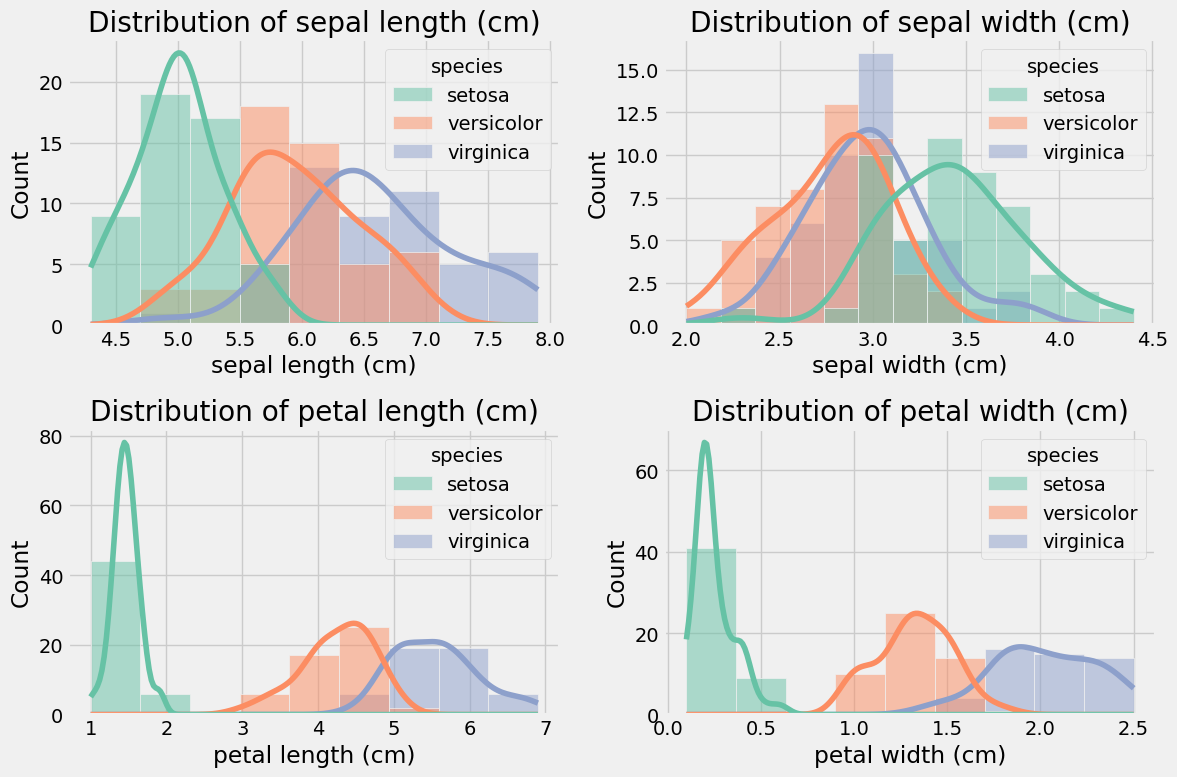

In [11]:
# Plot distributions of numerical features
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris_df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=iris_df, x=column, kde=True, hue='species', palette='Set2')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


#### Insights from Feature Distributions
- `Petal length (cm)` and `petal width (cm)` show clear separations between species, making them highly informative for classification.
- `Sepal length (cm)` and `sepal width (cm)` overlap more between species, indicating they might contribute less to distinguishing classes.


#### Pairplot to Explore Relationships

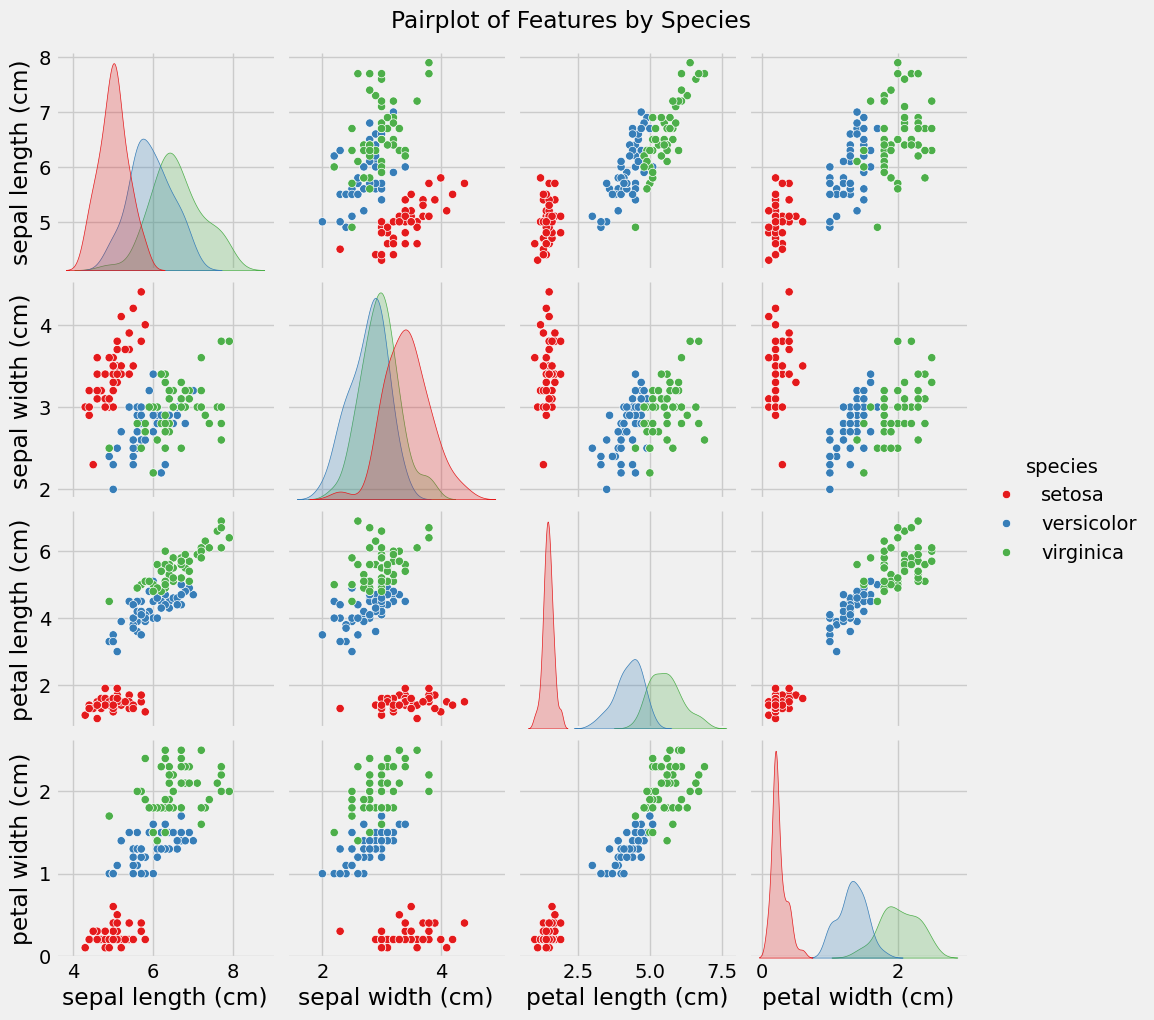

In [12]:
# Pairplot of the features
sns.pairplot(iris_df, hue='species', diag_kind='kde', palette='Set1')
plt.suptitle('Pairplot of Features by Species', y=1.02)
plt.show()


#### Insights from Pairplot
- The species `Setosa` is distinctly separable based on petal measurements.
- `Versicolor` and `Virginica` overlap significantly, suggesting they are harder to differentiate using certain feature pairs.
- Petal features show stronger clustering compared to sepal features.


#### Boxplots for Feature Comparison by Species


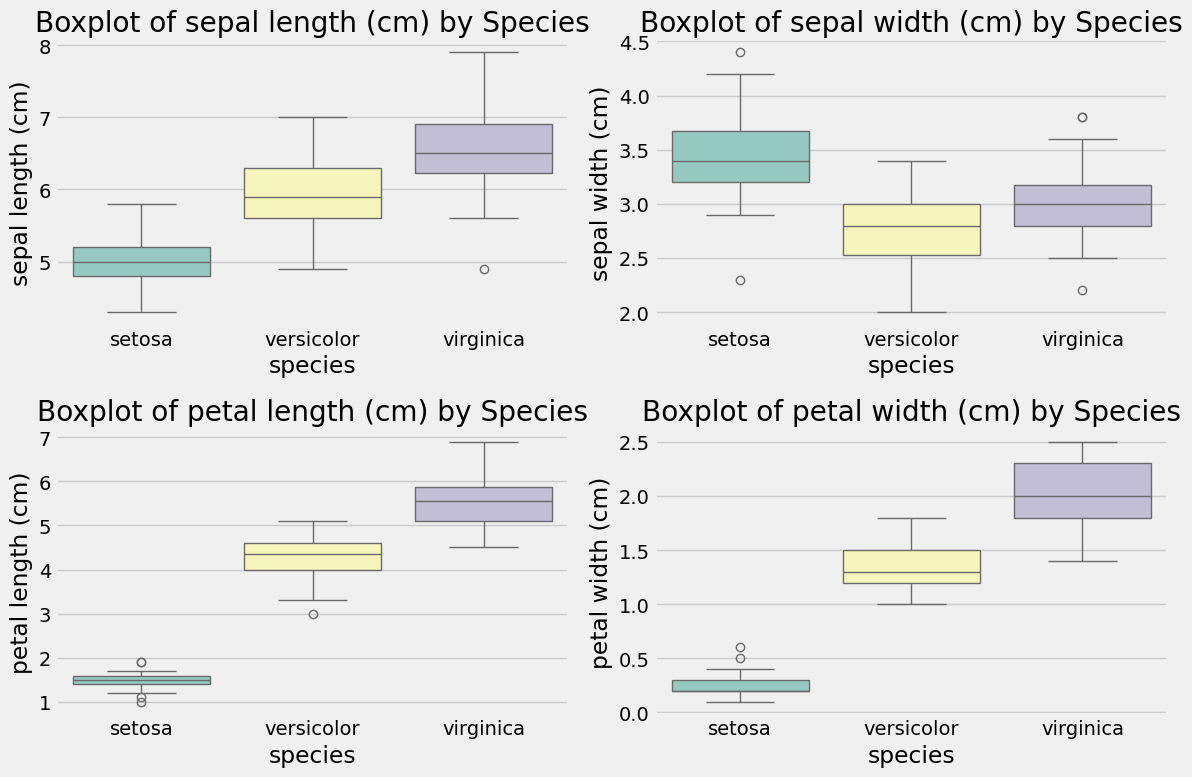

In [13]:
# Boxplot for feature comparison
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris_df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=iris_df, x='species', y=column, palette='Set3')
    plt.title(f'Boxplot of {column} by Species')
plt.tight_layout()
plt.show()


#### Insights from Boxplots
- `Setosa` consistently shows smaller petal lengths and widths compared to the other two species.
- `Virginica` generally has the largest measurements, particularly for petal features.
- There is moderate overlap in sepal measurements for `Versicolor` and `Virginica`, which might introduce classification challenges.


#### Correlation Heatmap


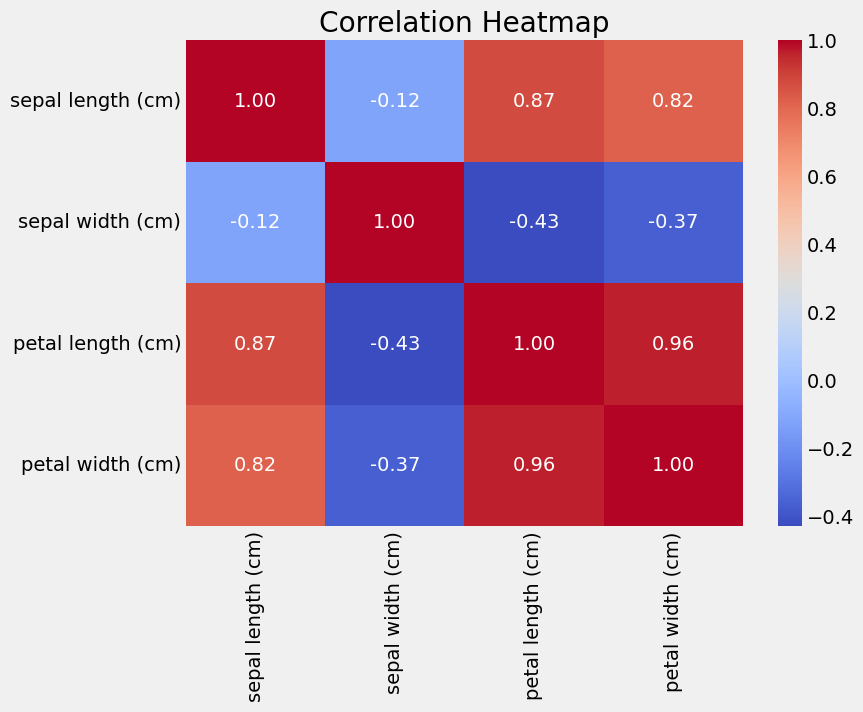

In [14]:
# Heatmap of feature correlations
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


#### Insights from Correlation Heatmap
- Petal length and petal width are highly correlated (0.96), indicating that one might predict the other effectively.
- Sepal width has a weaker correlation with other features, suggesting it might contribute less to classification performance.


### 5. Preprocessing
#### Feature Scaling


In [16]:
# Separate features and target
X = iris_df.iloc[:, :-1]
y = iris_df['species']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 6. What is K-Nearest Neighbors (KNN)?
K-Nearest Neighbors (KNN) is a distance-based algorithm used for classification and regression. It works by finding the 'K' nearest data points to a query point and assigning the majority label among those neighbors.

- **Why Use KNN?**
  - Simple and easy to implement.
  - Effective for small datasets.
  
- **Where to Use KNN?**
  - Classification problems with well-separated classes.
  - When computational efficiency isn't a primary concern.


### 7. Practical Implementation
#### Training the KNN Model


In [17]:
  # Train the KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)


#### Evaluating Performance


In [18]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Accuracy: 0.9111111111111111
Precision: 0.9298245614035088
Recall: 0.9111111111111111
F1 Score: 0.9095022624434389


### 8. Visualizing Decision Boundaries


In [27]:
from matplotlib.colors import ListedColormap

# Function to visualize decision boundaries
def plot_decision_boundaries(X, y, model, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predicting over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Convert string labels to numerical labels if necessary
    if isinstance(Z[0], str):
        unique_labels = np.unique(y)
        label_mapping = {label: i for i, label in enumerate(unique_labels)}
        Z = np.array([label_mapping[label] for label in Z])

    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))

    # Convert y to numerical labels for scatter plot if necessary
    if isinstance(y[0], str):
        y_numeric = np.array([label_mapping[label] for label in y])
        plt.scatter(X[:, 0], X[:, 1], c=y_numeric, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
    else:
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

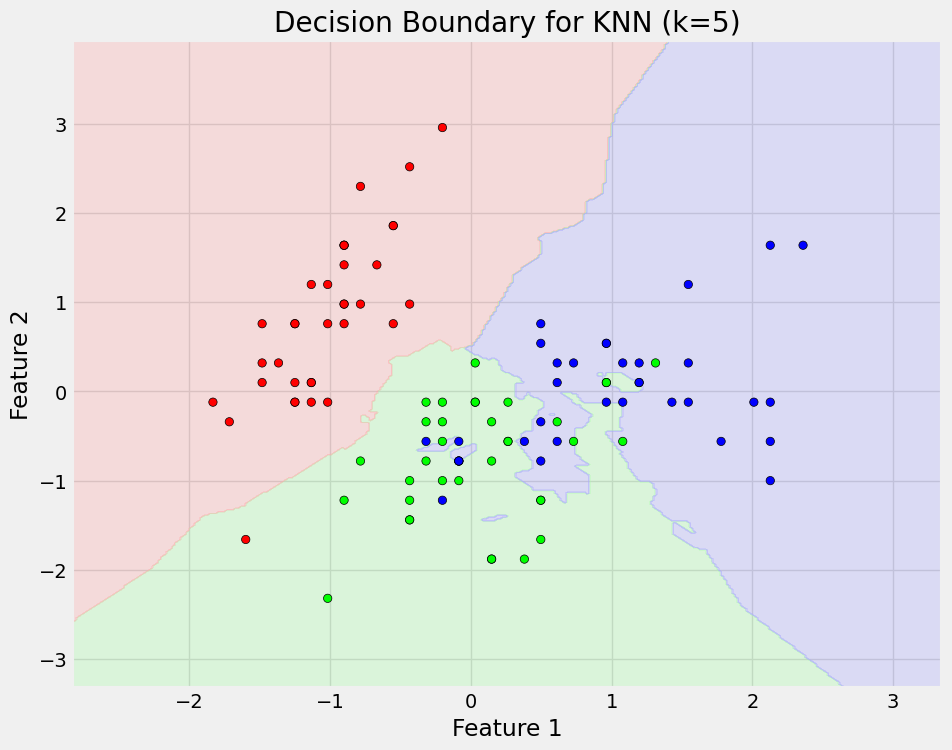

In [28]:
# Plot decision boundaries
plot_decision_boundaries(X_train_reduced, y_train, knn, title=f"Decision Boundary for KNN (k={k})")

### Decision Boundary Visualization for KNN (k=5)
- **Purpose**: Visualize how the KNN model classifies different regions of the feature space based on training data.
- **Method**:
  - Reduced the dataset to two features to make the visualization possible in 2D.
  - Created a mesh grid over the feature space and predicted the class for each point on the grid.
  - Plotted the decision boundaries by coloring regions based on class predictions.
- **Insights**:
  - The decision boundaries are non-linear and adapt to the training data points.
  - The boundaries highlight the areas of influence of each class, with overlapping regions indicating potential misclassifications.
- **Limitation**:
  - This visualization considers only two features; the actual model might use all features for classification.


### How K-Nearest Neighbors (KNN) Works
- **Concept**: KNN is a simple, non-parametric, lazy learning algorithm used for classification and regression tasks. It classifies data points based on the majority class of their nearest neighbors.

#### Steps:
* Calculate the distance between the input data point and all points in the training dataset using a distance metric (e.g., Euclidean, Manhattan).
* Select the `k` nearest data points (neighbors) based on the calculated distances.
* For classification, the class label of the input point is determined by the majority class of the `k` neighbors. For regression, the output is typically the average value of the neighbors.
* The decision boundary adapts dynamically to the distribution of data points and becomes smoother as `k` increases.

#### Key Points:
* **Feature Scaling**: Essential to normalize or standardize features since KNN relies on distance measures.
* **Choice of `k`**:
  * Small `k`: Model may overfit (sensitive to noise).
  * Large `k`: Model generalizes better but may lose local detail.
* **Applications**: Used in image recognition, recommender systems, and medical diagnosis, among others.

#### Advantages:
* Simple and easy to implement.
* Works well with non-linear data.

#### Limitations:
* Computationally expensive for large datasets.
* Sensitive to irrelevant features and the choice of distance metric.


### 9. Learnings
- The KNN algorithm is highly interpretable but computationally intensive for large datasets.
- Feature scaling is essential for KNN due to its reliance on distance metrics.
- The choice of \( K \) significantly impacts the performance and bias-variance tradeoff.
- Visualization of decision boundaries helps to understand model behavior intuitively.
